In [1]:
!pip install ucimlrepo pandas numpy scikit-learn matplotlib seaborn tensorflow


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

X = dow_jones_index.data.features
y = dow_jones_index.data.targets

df = pd.concat([X, y], axis=1)

df.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704,-4.428490
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814


In [3]:
feature_desc = {
    "quarter": "Kuartal dalam satu tahun (1–4)",
    "stock": "Kode saham Dow Jones",
    "date": "Tanggal akhir minggu (week ending)",
    "open": "Harga pembukaan minggu",
    "high": "Harga tertinggi minggu",
    "low": "Harga terendah minggu",
    "close": "Harga penutupan minggu",
    "volume": "Volume transaksi minggu tersebut",
    "percent_change_price": "Persentase perubahan harga selama minggu berjalan",
    "percent_change_volume_over_last_wk": "Perubahan volume dibanding minggu sebelumnya",
    "previous_weeks_volume": "Volume transaksi pada minggu sebelumnya",
    "next_weeks_open": "Harga pembukaan minggu berikutnya",
    "next_weeks_close": "Harga penutupan minggu berikutnya",
    "days_to_next_dividend": "Jumlah hari menuju dividen berikutnya",
    "percent_return_next_dividend": "Persentase return dividen berikutnya",
    "percent_change_next_weeks_price": "Persentase perubahan harga pada minggu berikutnya (TARGET)"
}

def contoh(series, k=3):
    vals = series.dropna().unique()[:k]
    return ", ".join(map(str, vals)) if len(vals) else "-"

desc_df = pd.DataFrame({
    "Nama Fitur": df.columns,
    "Tipe Data": [str(df[c].dtype) for c in df.columns],
    "Deskripsi": [feature_desc.get(c, "-") for c in df.columns],
    "Contoh Nilai": [contoh(df[c]) for c in df.columns]
})

desc_df


,Nama Fitur,Tipe Data,Deskripsi,Contoh Nilai
0,quarter,int64,Kuartal dalam satu tahun (1–4),"1, 2"
1,stock,object,Kode saham Dow Jones,"AA, AXP, BA"
2,date,object,Tanggal akhir minggu (week ending),"1/7/2011, 1/14/2011, 1/21/2011"
3,open,object,Harga pembukaan minggu,"$15.82, $16.71, $16.19"
4,high,object,Harga tertinggi minggu,"$16.72, $16.71, $16.38"
5,low,object,Harga terendah minggu,"$15.78, $15.64, $15.60"
6,close,object,Harga penutupan minggu,"$16.42, $15.97, $15.79"
7,volume,int64,Volume transaksi minggu tersebut,"239655616, 242963398, 138428495"
8,percent_change_price,float64,Persentase perubahan harga selama minggu berjalan,"3.79267, -4.42849, -2.47066"
9,percent_change_volume_over_last_wk,float64,Perubahan volume dibanding minggu sebelumnya,"1.380223028, -43.02495926, 9.355500109"


In [4]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

duplicates = df.duplicated().sum()

df["label"] = (df["percent_change_next_weeks_price"] > 0).astype(int)
class_dist = df["label"].value_counts(normalize=True) * 100

missing, missing_pct, duplicates, class_dist


(quarter                                0
 stock                                  0
 date                                   0
 open                                   0
 high                                   0
 low                                    0
 close                                  0
 volume                                 0
 percent_change_price                   0
 percent_change_volume_over_last_wk    30
 previous_weeks_volume                 30
 next_weeks_open                        0
 next_weeks_close                       0
 days_to_next_dividend                  0
 percent_return_next_dividend           0
 percent_change_next_weeks_price        0
 dtype: int64,
 quarter                               0.0
 stock                                 0.0
 date                                  0.0
 open                                  0.0
 high                                  0.0
 low                                   0.0
 close                                 0.0
 volume     

**5.1 Data Cleaning**

In [5]:
import pandas as pd
import numpy as np

df_clean = df.copy()

# (1) Data type conversion
price_cols = ["open","high","low","close","next_weeks_open","next_weeks_close"]
for c in price_cols:
    # Remove '$' and then convert to numeric
    df_clean[c] = df_clean[c].astype(str).str.replace('$', '', regex=False)
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

# (2) Removing duplicates
dup_count = int(df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()
print("Duplicate removed:", dup_count)

# (3) Handling missing values (median untuk kolom numerik)
num_cols = df_clean.select_dtypes(include=[np.number]).columns
missing_before = df_clean.isna().sum()
print("Missing (before filling with median):\n", missing_before[missing_before>0])

for col in num_cols:
    if df_clean[col].isnull().any():
        median_val = df_clean[col].median()
        if pd.isna(median_val): # If the column was entirely NaN (median is NaN), fill with 0
            df_clean[col] = df_clean[col].fillna(0)
        else:
            df_clean[col] = df_clean[col].fillna(median_val)

missing_after = df_clean.isna().sum()
print("Missing (after filling):\n", missing_after[missing_after>0])

# (4) Outliers (DETEKSI saja dengan IQR; tidak dihapus karena data saham volatil)
def iqr_outlier_count(s: pd.Series) -> int:
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty: return 0
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0: return 0
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lower) | (s > upper)).sum())

outliers = {c: iqr_outlier_count(df_clean[c]) for c in num_cols}
outliers = pd.Series(outliers).sort_values(ascending=False)
print("Top outliers (IQR):\n", outliers.head(5))

Duplicate removed: 0
Missing (before filling with median):
 percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
dtype: int64
Missing (after filling):
 Series([], dtype: int64)
Top outliers (IQR):
 previous_weeks_volume                 76
volume                                74
percent_return_next_dividend          41
percent_change_volume_over_last_wk    32
close                                 25
dtype: int64


**Feature Engineering**

In [6]:
df_fe = df_clean.copy()

# Target klasifikasi
df_fe["label_updown"] = (df_fe["percent_change_next_weeks_price"] > 0).astype(int)

# Drop kolom yang bisa bocorin masa depan / tidak dipakai
drop_cols = [
    "percent_change_next_weeks_price",  # target asli (regresi), kita ubah jadi label
    "next_weeks_open", "next_weeks_close",  # leakage (minggu depan)
    "date", "stock"  # opsional: drop karena non-numeric & bukan fokus
]
X_df = df_fe.drop(columns=drop_cols)
y = df_fe["label_updown"]

print("X shape:", X_df.shape, "y shape:", y.shape)


X shape: (750, 13) y shape: (750,)


**Data Transformation**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)  # numpy array

print("Scaled X shape:", X_scaled.shape)

Scaled X shape: (750, 13)


### 5.4 Data Splitting

**Strategi Pembagian Data:**

Untuk persiapan model klasifikasi, data akan dibagi menjadi training dan testing set dengan detail sebagai berikut:

*   **Training set:** 80% dari total data.
*   **Test set:** 20% dari total data.

**Alasan:**

*   **Stratified Split:** Pembagian dilakukan secara terstratifikasi (`stratify=y`) untuk mempertahankan proporsi distribusi kelas (target `y`) yang sama di training dan testing set. Ini penting untuk model klasifikasi, terutama jika distribusi kelas tidak seimbang, agar model tidak bias terhadap kelas mayoritas.
*   **Random State:** Penggunaan `random_state=42` memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan, sehingga hasil eksperimen dapat direproduksi.

Berikut adalah implementasi pembagian data:

In [8]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

# Memverifikasi distribusi kelas di training dan testing set
print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Ukuran X_train: (600, 13)
Ukuran X_test: (150, 13)
Ukuran y_train: (600,)
Ukuran y_test: (150,)

Distribusi kelas di y_train:
label_updown
1    0.516667
0    0.483333
Name: proportion, dtype: float64

Distribusi kelas di y_test:
label_updown
1    0.513333
0    0.486667
Name: proportion, dtype: float64


**Model 1 — Baseline Model Logistic Regression**

In [9]:
#@title Logistic Regression - Baseline Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
model_baseline = LogisticRegression(
    C=1.0,
    max_iter=100,
    solver='lbfgs',
    penalty='l2',
    random_state=42
)

# Training model
model_baseline.fit(X_train, y_train)

# Prediksi data test
y_pred_baseline = model_baseline.predict(X_test)

# Evaluasi model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", accuracy_baseline)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))


Baseline Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



**Model 2 — ML / Advanced Model**

In [10]:
#@title Random Forest Classifier (Advanced Model)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ---- Hyperparameter Tuning ----
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# ---- Build model with best params ----
best_params = random_search.best_params_

model_advanced = RandomForestClassifier(
    **best_params,
    random_state=42
)

# Train model
model_advanced.fit(X_train, y_train)

# Predict
y_pred_advanced = model_advanced.predict(X_test)

# Evaluate
accuracy_advanced = accuracy_score(y_test, y_pred_advanced)
print("Random Forest Accuracy:", accuracy_advanced)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_advanced))


Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best CV Accuracy: 1.0
Random Forest Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



**6.3	Model 3 — Deep Learning Model Multilayer Perceptron (MLP)**

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Input dimension
input_dim = X_train.shape[1]

# Define model
model_dl = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Compile model
model_dl.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model_dl.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5987 - loss: 0.6631 - val_accuracy: 0.8750 - val_loss: 0.5199 - learning_rate: 0.0010
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9080 - loss: 0.4500 - val_accuracy: 0.9750 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9879 - loss: 0.2754 - val_accuracy: 0.9833 - val_loss: 0.2112 - learning_rate: 0.0010
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9928 - loss: 0.1605 - val_accuracy: 0.9917 - val_loss: 0.1137 - learning_rate: 0.0010
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0613 - learning_rate: 0.0010
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0494 - val_accuracy: 1.0000 - val_loss: 0.0356 - learning_rate: 0.0010
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy

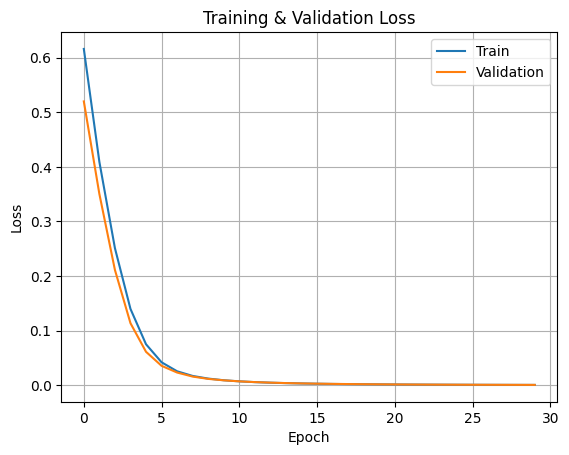

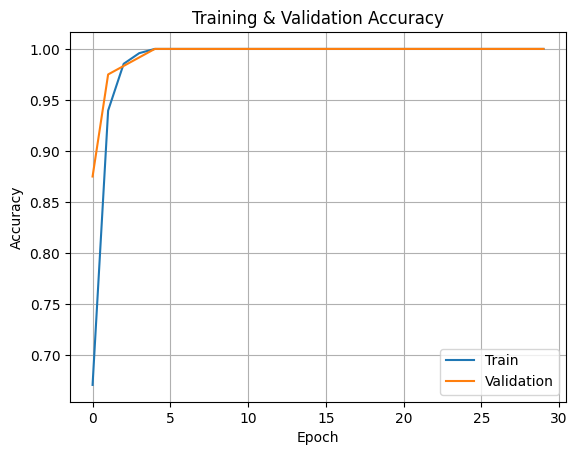

In [12]:
import matplotlib.pyplot as plt

# history = output dari model_dl.fit(...)
# pastikan kamu punya variabel `history`

# 1) Training & Validation Loss
plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 2) Training & Validation Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


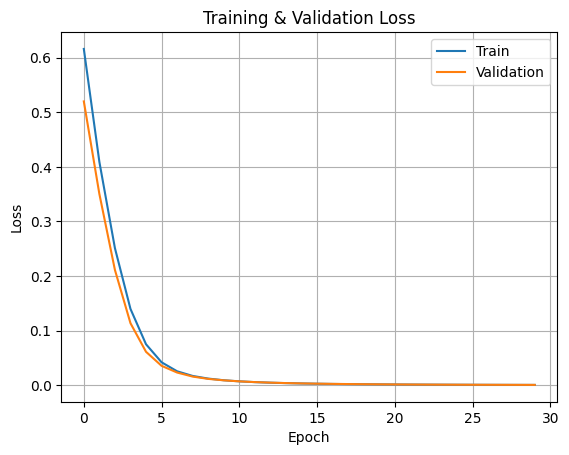

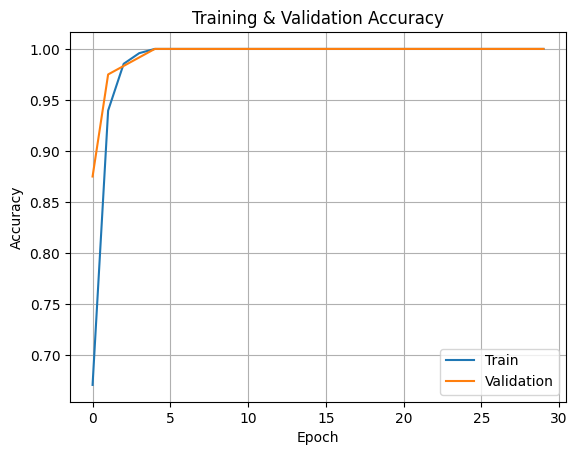

Saved to: images/mlp_loss.png dan images/mlp_accuracy.png


In [13]:
import os
os.makedirs("images", exist_ok=True)

plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("images/mlp_loss.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("images/mlp_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved to: images/mlp_loss.png dan images/mlp_accuracy.png")


In [14]:
# Menampilkan ringkasan model di output
model_dl.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

=== Model 1: Logistic Regression (Baseline) ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



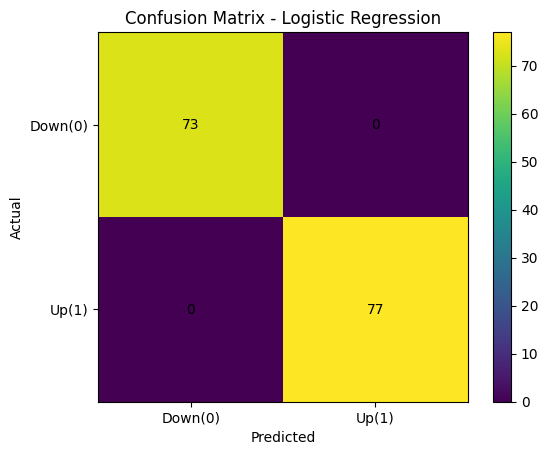

In [15]:
#@title Evaluation - Model 1 (Logistic Regression)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prediksi
y_pred_baseline = model_baseline.predict(X_test)

# Metrik
acc = accuracy_score(y_test, y_pred_baseline)
prec = precision_score(y_test, y_pred_baseline)
rec = recall_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline)

print("=== Model 1: Logistic Regression (Baseline) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1], ["Down(0)", "Up(1)"])
plt.yticks([0,1], ["Down(0)", "Up(1)"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.show()


=== Model 2: Random Forest (Advanced) ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



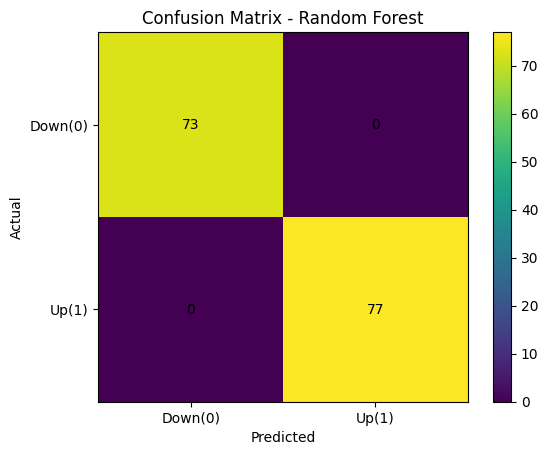

In [16]:
#@title Evaluation - Model 2 (Random Forest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prediksi
y_pred_rf = model_advanced.predict(X_test)

# Metrik
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("=== Model 2: Random Forest (Advanced) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1], ["Down(0)", "Up(1)"])
plt.yticks([0,1], ["Down(0)", "Up(1)"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
=== Model 3: MLP (Deep Learning) ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        77

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



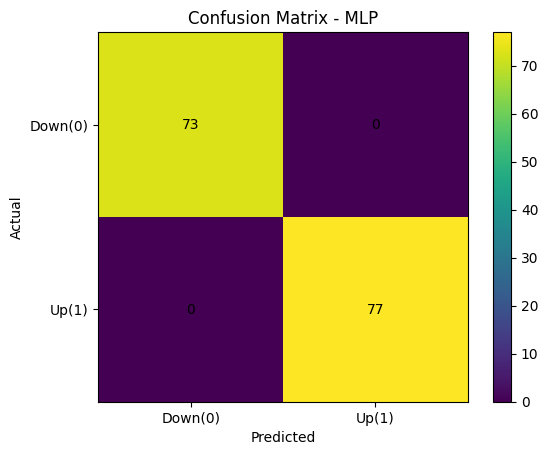

In [17]:
#@title Evaluation - Model 3 (MLP Deep Learning)

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prediksi probabilitas -> kelas
y_prob_mlp = model_dl.predict(X_test).ravel()
y_pred_mlp = (y_prob_mlp >= 0.5).astype(int)

# Metrik
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print("=== Model 3: MLP (Deep Learning) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1], ["Down(0)", "Up(1)"])
plt.yticks([0,1], ["Down(0)", "Up(1)"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.show()


=== Tabel Perbandingan 3 Model ===
                         Model Accuracy Precision Recall F1-Score Training Time (s) Inference Time (s)
Baseline (Logistic Regression)   1.0000    1.0000 1.0000   1.0000            0.0065             0.0006
      Advanced (Random Forest)   1.0000    1.0000 1.0000   1.0000            0.4848             0.0172
           Deep Learning (MLP)   1.0000    1.0000 1.0000   1.0000            3.0084             0.0732


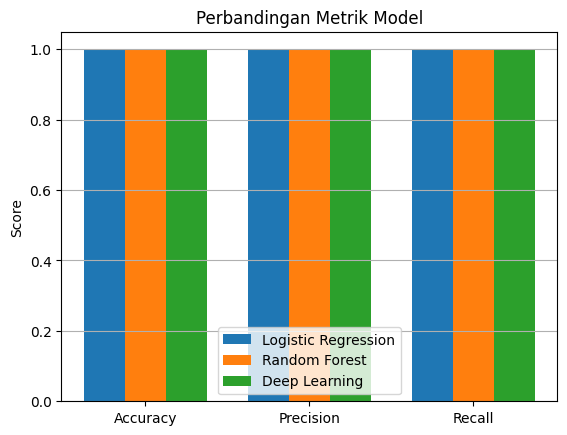

In [18]:
#@title 7.3 Perbandingan Ketiga Model (Table + Bar Chart)

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---------- Helper evaluasi ----------
def eval_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }

# ---------- Timing: Logistic Regression ----------
t0 = time.time()
model_baseline.fit(X_train, y_train)
train_lr = time.time() - t0

t0 = time.time()
y_pred_lr = model_baseline.predict(X_test)
infer_lr = time.time() - t0

m_lr = eval_metrics(y_test, y_pred_lr)

# ---------- Timing: Random Forest ----------
t0 = time.time()
model_advanced.fit(X_train, y_train)
train_rf = time.time() - t0

t0 = time.time()
y_pred_rf = model_advanced.predict(X_test)
infer_rf = time.time() - t0

m_rf = eval_metrics(y_test, y_pred_rf)

# ---------- Timing: MLP ----------
# (training ulang biar training time bener, kalau kamu gak mau retrain, skip bagian ini)
t0 = time.time()
history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=0
)
train_mlp = time.time() - t0

t0 = time.time()
y_prob_mlp = model_dl.predict(X_test, verbose=0).ravel()
y_pred_mlp = (y_prob_mlp >= 0.5).astype(int)
infer_mlp = time.time() - t0

m_mlp = eval_metrics(y_test, y_pred_mlp)

# ---------- Buat tabel perbandingan ----------
df_compare = pd.DataFrame([
    ["Baseline (Logistic Regression)", m_lr["Accuracy"], m_lr["Precision"], m_lr["Recall"], m_lr["F1-Score"], train_lr, infer_lr],
    ["Advanced (Random Forest)",       m_rf["Accuracy"], m_rf["Precision"], m_rf["Recall"], m_rf["F1-Score"], train_rf, infer_rf],
    ["Deep Learning (MLP)",            m_mlp["Accuracy"], m_mlp["Precision"], m_mlp["Recall"], m_mlp["F1-Score"], train_mlp, infer_mlp],
], columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)", "Inference Time (s)"])

# Bulatkan biar rapi
df_show = df_compare.copy()
for col in ["Accuracy","Precision","Recall","F1-Score"]:
    df_show[col] = df_show[col].map(lambda x: f"{x:.4f}")
df_show["Training Time (s)"] = df_show["Training Time (s)"].map(lambda x: f"{x:.4f}")
df_show["Inference Time (s)"] = df_show["Inference Time (s)"].map(lambda x: f"{x:.4f}")

print("=== Tabel Perbandingan 3 Model ===")
print(df_show.to_string(index=False))

# ---------- Visualisasi perbandingan (bar chart) ----------
metrics = ["Accuracy", "Precision", "Recall"]
x = np.arange(len(metrics))
width = 0.25

plt.figure()
plt.bar(x - width, [m_lr[m] for m in metrics], width, label="Logistic Regression")
plt.bar(x,         [m_rf[m] for m in metrics], width, label="Random Forest")
plt.bar(x + width, [m_mlp[m] for m in metrics], width, label="Deep Learning")

plt.title("Perbandingan Metrik Model")
plt.ylabel("Score")
plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, axis="y")
plt.show()


In [19]:
!pip freeze > requirements.txt


In [20]:
import sys
import numpy
import pandas
import sklearn
import matplotlib
import seaborn
import tensorflow

print("Python:", sys.version)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("tensorflow:", tensorflow.__version__)


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1
matplotlib: 3.10.0
seaborn: 0.13.2
tensorflow: 2.19.0


In [21]:
import joblib

# Simpan Logistic Regression
joblib.dump(model_baseline, "model_logistic_regression.pkl")
# Simpan Random Forest
joblib.dump(model_advanced, "model_random_forest.pkl")
# Simpan MLP model
model_dl.save("model_mlp.h5")


In [22]:
from google.colab import files

files.download("model_logistic_regression.pkl")
files.download("model_random_forest.pkl")
files.download("model_mlp.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>